# Preparation data

In [1]:
!pip install ipyleaflet
!pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.7 MB 4.9 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 1.6 MB 49.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime
from ipywidgets import HTML
from ipyleaflet import Map, Marker, Popup
sns.set(context="notebook", style="darkgrid")

In [3]:
data = pd.read_csv('/content/data_air.csv')

In [4]:
data.head()

,datetime,stationId,source,city,address,lat,lng,pm25
0,2022-01-06 02:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,132.0
1,2022-01-10 13:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,95.0
2,2022-01-13 20:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,78.0
3,2022-01-14 08:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,17.0
4,2022-01-14 10:00:00 UTC,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,42.0


In [ ]:
data.shape

(63138, 8)

#### I have data about air of Almaty, consisting of 63138 rows and 8 cowls.

Datetime is time from 2020-06-21 to 2022-01-16.

StationId is sensor of air

Address are streets of Almaty

Source is website of data air. there are 3 websites US Conculate, PurpleAir.com, IQAir that provide data air of Almay.

Pm25 is level of polluted air

In [ ]:
def missing_value(data=data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys = ["total","percent"])

In [ ]:
missing_value(data)

,total,percent
pm25,0,0.0
lng,0,0.0
lat,0,0.0
address,0,0.0
city,0,0.0
source,0,0.0
stationId,0,0.0
datetime,0,0.0


Checking for missing value 

In [5]:
pd_data = data.copy()
pd_data["datetime"] = pd.to_datetime(pd_data["datetime"]).dt.date

In [ ]:
pd_data.head()

,datetime,stationId,source,city,address,lat,lng,pm25
0,2022-01-06,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,132.0
1,2022-01-10,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,95.0
2,2022-01-13,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,78.0
3,2022-01-14,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,17.0
4,2022-01-14,s1,US Consulate,Алматы,Абая - Саина,43.22189,76.850993,42.0


# Data visualization 

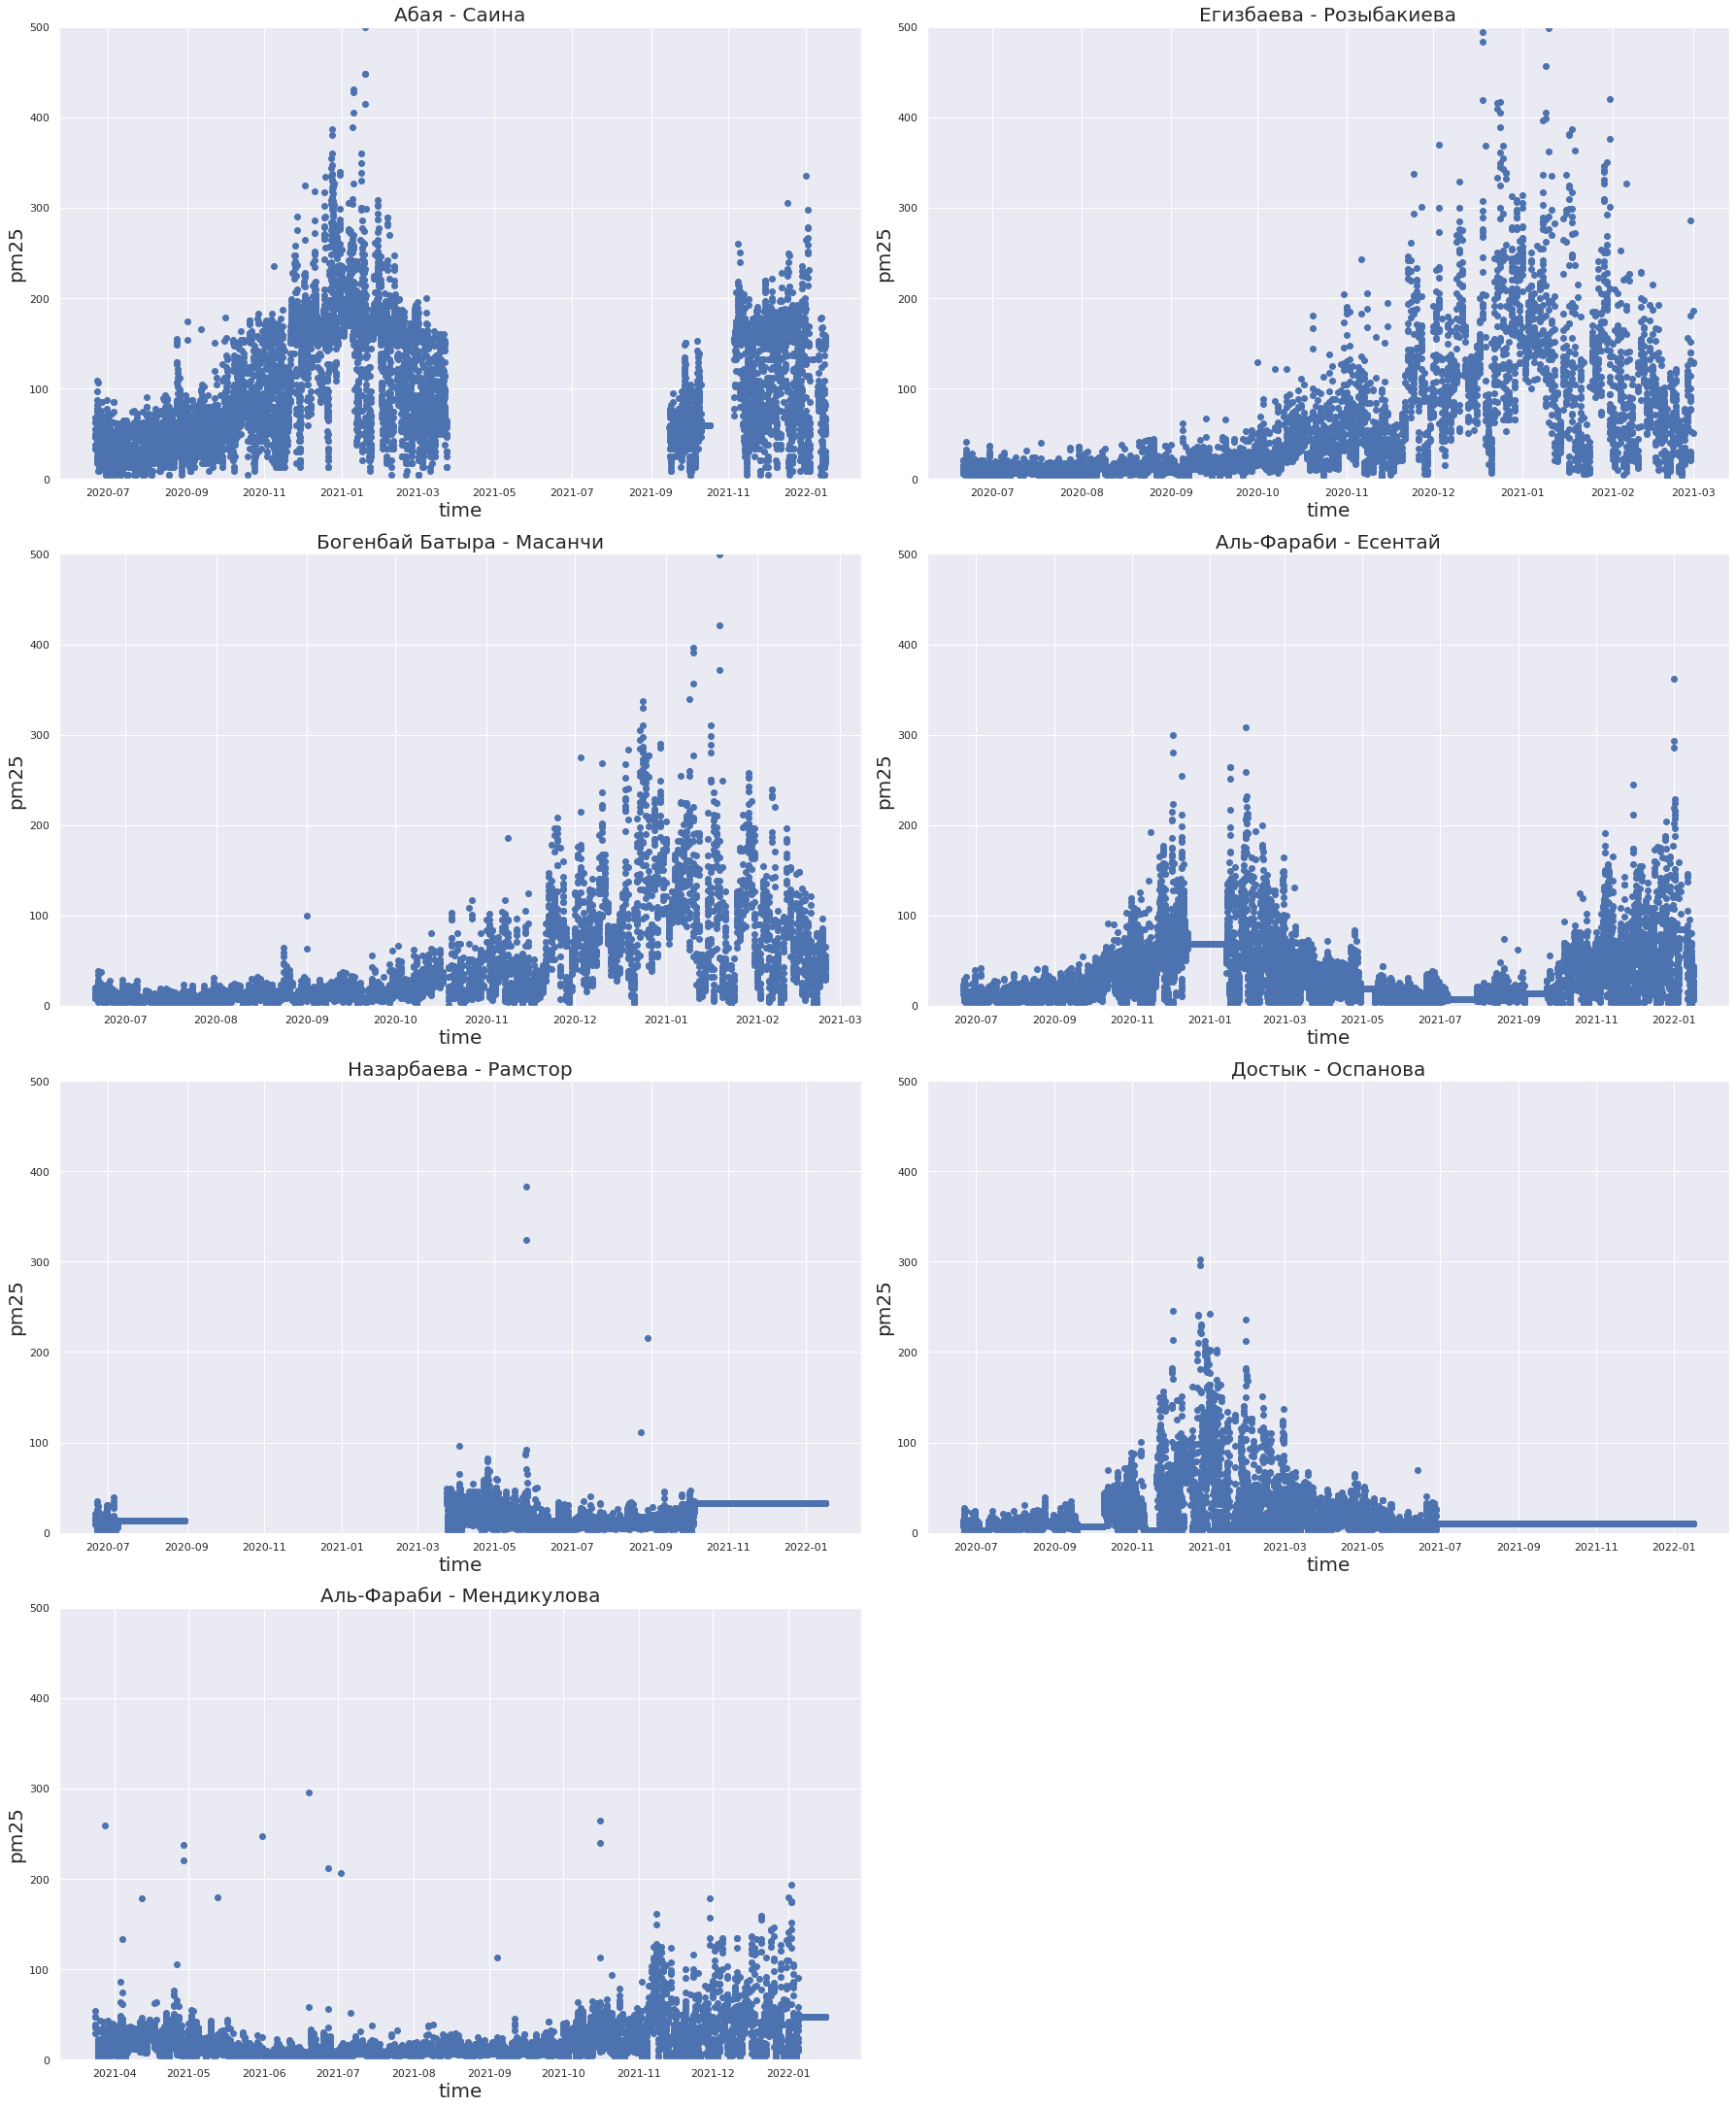

In [6]:
fig, axs = plt.subplots(4,2, figsize=(25,30))
fig.delaxes(axs[3,1])
name_streets = pd_data["address"].unique().tolist()
for index in range(len(name_streets)):
    filter_data = pd_data[pd_data["address"] == name_streets[index]]
    plt.subplot(4,2,index+1)
    plt.tight_layout() 
    plt.scatter(filter_data["datetime"], filter_data["pm25"])
    plt.title(name_streets[index], size=20)
    plt.axis(ymin=0, ymax=500)
    plt.ylabel("pm25", fontsize=20)
    plt.xlabel("time", fontsize=20)

streets where pollution of air is on high level are: Абая - Сайна, Егизбаева - Розыбакиева, Богенбай батыр - Масанчи, Аль-Фараби-Есентай

streets where pollution of air is on normol level are: Аль-Фараби - Мендикулова, Назарбаева - Рамстор, Достык - Оспанова

In [25]:
pd_data.tail()

,datetime,stationId,source,city,address,lat,lng,pm25
63133,2021-09-10,s6,PurpleAir.com,Алматы,Назарбаева - Рамстор,43.230924,76.950390,6.97
63134,2021-05-20,s7,PurpleAir.com,Алматы,Достык - Оспанова,43.204942,76.975031,6.97
63135,2021-05-12,s8,PurpleAir.com,Алматы,Аль-Фараби - Мендикулова,43.227126,76.956792,6.97
63136,2021-04-03,s8,PurpleAir.com,Алматы,Аль-Фараби - Мендикулова,43.227126,76.956792,6.97
63137,2021-12-07,s8,PurpleAir.com,Алматы,Аль-Фараби - Мендикулова,43.227126,76.956792,6.97


In [11]:
stations = pd_data.drop(['datetime', 'source', 'city'], axis=1)

In [15]:
stations_mean = stations.groupby(stations['stationId']).mean()

In [18]:
stations_mean

,lat,lng,pm25
stationId,,,
s1,43.221890,76.850993,98.848386
s2,43.230287,76.886544,60.582004
s3,43.252323,76.931237,49.080415
s5,43.219596,76.930487,33.216417
s6,43.230924,76.950390,21.717317
s7,43.204942,76.975031,18.277114
s8,43.227126,76.956792,22.122418


In [16]:
stations_points = []
i = 0
while i < len(stations_mean.index):
    stations_points.append({'index': i, 'Coordinates': [stations_mean['lat'][i], stations_mean['lng'][i]], 'pm25_mean': stations_mean['pm25'][i]})
    i += 1

In [17]:
stations_coordinates = [stations['Coordinates'] for stations in stations_points]
stations_coordinates = [[float(x) for x in y] for y in stations_coordinates]

In [19]:
m = Map(center=(43.219596, 76.930487), zoom=11)

In [20]:
markers = [Marker(location=(stations_coordinates[i])) for i in range(len(stations_coordinates))]

In [21]:
info_box_template = """
<dl>
<dt>pm25 среднее:</dt><dd>{pm25_mean}</dd>
</dl>
"""

In [22]:
locations_info  = [info_box_template.format(**point) for point in stations_points]

In [23]:
for i in range(len(markers)):
    markers[i].popup = HTML(locations_info[i])
    m.add_layer(markers[i])

In [24]:
m

Map(center=[43.219596, 76.930487], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…